In [4]:
import numpy as np
import mne
from matplotlib import pyplot as plt 
import os
import load
from paths import paths
import setup
from functions import (start_stop_samples_trigg , start_samples_trigg, add_trial_info_to_events,
    plot_fix_durs_mem_vs,plot_fix_durs_all_phases,closest_tuple,plot_trial, create_full_metadata)

import matplotlib.image as mpimg
import matplotlib.patches as patches
import pandas as pd
from  plot_general import rose_plot
#%matplotlib qt

# Eye movement behaviour analysis

In [2]:
#info.initialize_logging()
import logging
import datetime
log_filename = 'analysis_' + datetime.datetime.now().strftime('%Y%m%d%H%M%S') + '.log'
#logging.basicConfig(filename=os.path.join(self.log_path, log_filename), level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

log_filename

'analysis_20230527030338.log'

In [6]:
load.subject()


TypeError: subject.__init__() missing 1 required positional argument: 'exp_info'

In [5]:
info = setup.exp_info()
info.initialize_logging()
metadata_path = paths().full_metadata_path()
subjects_ids = info.subjects_ids
#----------parameters-------------
save_ev = True
capturing_thr = 80


for sub_id in [subjects_ids[0]]:
    evts = create_full_metadata(info,sub_id,metadata_path,capturing_thr, save_ev)
    
    



Ｌｏａｄｉｎｇ ＥＥＧ ｄａｔａ．．．．．
        ｓｕｂｊｅｃｔ   Ｓ１０１

No .ds files found in directory: /media/dac/SSD-curie/Hybrid/Hybrid_preana_out/8.data_analysis/

Ｌｏａｄｉｎｇ ｅｖｅｎｔｓ ｄａｔａ．．．．．
        ｆｒｏｍ

/ｍｅｄｉａ/ｄａｃ/ＳＳＤ－ｃｕｒｉｅ/Ｈｙｂｒｉｄ/Ｈｙｂｒｉｄ_ｐｒｅａｎａ_ｏｕｔ/９．ｅｖｅｎｔ_ｓｔｒｕｃｔｓ/Ｓ１０１_ｅｖｅｎｔｓ．ｃｓｖ

No event files found in directory: /media/dac/SSD-curie/Hybrid/Hybrid_preana_out/9.event_structs/

Ｌｏａｄｉｎｇ ｂｅｈａｖｉｏｕｒａｌ ｄａｔａ．．．．．
            ｆｒｏｍ   [＇１０１_ｈｙｂｒｉｄ_ｓｅａｒｃｈ_ｂｕｉｌｄｅｒ_ｃｏｄｅ_２０２１_Ｎｏｖ_２３_１０２１．ｃｓｖ＇]



TypeError: 'NoneType' object does not support item assignment

In [4]:
evts#plot_trial(eeg,suj,31)
print(evts.columns.tolist())


['type', 'latency', 'urevent', 'duration', 'endtime', 'sac_amplitude', 'sac_endpos_x', 'sac_endpos_y', 'sac_startpos_x', 'sac_startpos_y', 'sac_vmax', 'fix_avgpos_x', 'fix_avgpos_y', 'fix_avgpupilsize', 'sac_angle', 'trial', 'phase', 'mss', 'ontarget', 'ondistractor', 'present', 'correct', 'stm']


In [13]:
#make epochs from fixations in different experimental phases
ev_fix = evts[(evts['type']=='fixation') & (evts['phase']=='vs') & (evts['ondistractor']==1)]
#ev_fix = ev_fix.iloc[np.where(ev_fix['latency'].diff()>50)] #limit overlap
event = [ (np.int(record[1]),0,1) for record in  ev_fix.to_records(index=False) if 600>record[3]>100]
epochs = mne.Epochs(eeg, event, 1, tmin=-0.2, tmax=0.3, reject_by_annotation=True,
                    preload=True)
#epochs.plot_drop_log()




Not setting metadata
1597 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1597 events and 251 original time points ...


/var/folders/gf/gp61rxzn3pz1rqw464l71d7w0000gn/T/ipykernel_86321/1182897004.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  event = [ (np.int(record[1]),0,1) for record in  ev_fix.to_records(index=False) if 600>record[3]>100]


2 bad epochs dropped


In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa

#epochs['1'].plot_image(picks='B9', combine='mean')
mne.viz.plot_alignment(eeg.info,eeg='original')

In [1]:
%matplotlib inline
#%matplotlib qt
evoked = epochs.average(picks=range(128))
# Plot the average response for each channel in the same figure
evoked.plot(spatial_colors=True, gfp=True)

NameError: name 'epochs' is not defined

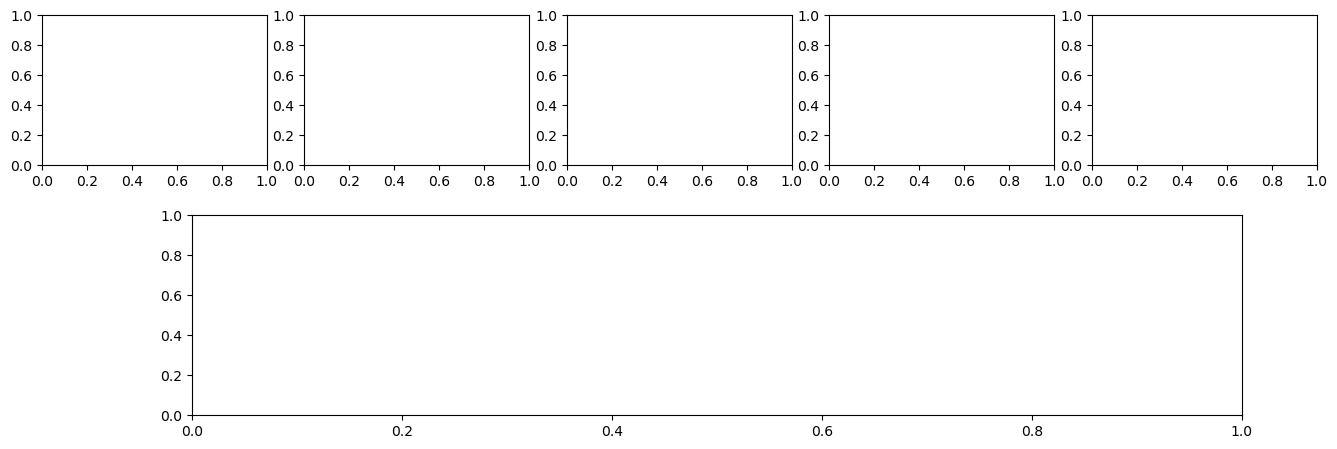

: 

In [27]:
fig = plt.figure(figsize=(15, 5))

# 1st row Topoplots
ax1 = fig.add_axes([0.05, 0.6, 0.15, 0.3])
ax2 = fig.add_axes([0.225, 0.6, 0.15, 0.3])
ax3 = fig.add_axes([0.4, 0.6, 0.15, 0.3])
ax4 = fig.add_axes([0.575, 0.6, 0.15, 0.3])
ax5 = fig.add_axes([0.75,  0.6, 0.15, 0.3])

# 2nd row PSD
ax6 = fig.add_axes([0.15,  0.1, 0.7, 0.4])

# Group axes
axs_topo = [ax1, ax2, ax3, ax4, ax5]
ax_psd = ax6

In [6]:
np.where(ev_fix['latency'].diff()>80)

NameError: name 'ev_fix' is not defined

In [7]:
#check duration of each phase , make function to see all the results as a df
xstar_samp, xstop_samp = start_stop_samples_trigg(evts,'cross1')
(xstop_samp-xstar_samp)/500


array([0.75 , 0.75 , 0.75 , 0.752, 0.75 , 0.752, 0.75 , 0.75 , 0.75 ,
       0.75 , 0.75 , 0.75 , 0.75 , 0.75 , 0.75 , 0.752, 0.75 , 0.75 ,
       0.75 , 0.752, 0.75 , 0.75 , 0.752, 0.75 , 0.75 , 0.75 , 0.75 ,
       0.75 , 0.75 , 0.752, 0.752, 0.75 , 0.75 , 0.752, 0.75 , 0.75 ,
       0.75 , 0.75 , 0.75 , 0.752, 0.752, 0.75 , 0.75 , 0.75 , 0.75 ,
       0.75 , 0.75 , 0.75 , 0.752, 0.752, 0.752, 0.75 , 0.75 , 0.714,
       0.75 , 0.632, 0.746, 0.642, 0.71 , 0.696, 0.582, 0.66 , 0.558,
       0.642, 0.57 , 0.626, 0.532, 0.592, 0.51 , 0.556, 0.47 , 0.402,
       0.386, 0.474, 0.38 , 0.432, 0.324, 0.414, 0.326, 0.384, 0.308,
       0.338, 0.256, 0.322, 0.154, 0.184, 0.206, 0.104, 0.22 , 0.102,
       0.144, 0.15 , 0.058, 0.036, 0.142, 0.032, 0.002, 0.042, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.   , 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002,

In [11]:
#epochs.plot_image(picks=range(128), combine='gfp')

In [10]:
eeg.annotations

<Annotations | 20144 segments: 250 (210), bad_ET (116), fixation (9862), ...>

In [79]:
is_close_to_any_point(point[0], point[1], tuples, threshold)

(True, array([0]))

In [8]:
eeg.plot_sensors(ch_type='eeg', axes=ax2d)

NameError: name 'ax2d' is not defined

In [230]:
 evts[evts['latency']==i][['fix_avgpos_x','fix_avgpos_y']]

,fix_avgpos_x,fix_avgpos_y
20770,921.710205,454.382111


In [211]:
keyRight  =bh_data.loc[::6,'corrAns'][:-1]=='right'
presents = list(bh_data.loc[::6,'st5_cat']=='T')
sum(presents[:-1]==keyRight)
pp=pd.DataFrame({'preset':presents[:-1],'key':keyRight})
pp

,preset,key
0,False,False
6,True,True
12,True,True
18,True,True
24,True,True
...,...,...
1230,True,True
1236,True,True
1242,False,False
1248,False,False


In [213]:
sum(keyRight)
len(keyRight)

210

In [1]:
#pp[~( presents[:-1]==keyRight)]
#cmp_shelves_108_teddybear_021.jpg
#cmp_building_057_dog_014.jpg
#REMEMBER CORR ANS IS WRONG FOR THIS TWO
#and 
#Dog1962 T and cmp_meadow_001_dog_001 IT IS NOT target present I mean , the presumed target is not present in the imagesearch
#it should be hardcoded as Absent condition always

In [4]:
paths().results_path()
info = setup.exp_info()


In [9]:
info.subjects_ids

['S101',
 'S102',
 'S103',
 'S104',
 'S105',
 'S106',
 'S107',
 'S108',
 'S109',
 'S110',
 'S111',
 'S112',
 'S113',
 'S114',
 'S115',
 'S116',
 'S117',
 'S118',
 'S119']

In [6]:
evts = add_trial_info_to_events(evts,bh_data,100)


percentage of correct answers : 65.2
fixations in cross1 phase : 155

fixations in mem phase    : 2207

fixations in cross2 phase : 484

fixations in vs phase     : 5457

saccade     9956
fixation    9862
cross1       210
mem          210
cross2       210
vs           210
bad_ET       116
Name: type, dtype: int64
total fixations on items    : 4663
fixations on targets  : 303
fixations on distractors  : 4360
percentage of capture fixations in vs 85.4%


NameError: name 'logger' is not defined

In [10]:
logger = logging.getLogger()
logger.info("Percentage of correct answers: %.1f %%", 33)


In [20]:
eeg

<RawEEGLAB | S101_analysis.fdt, 148 x 1769500 (3539.0 s), ~1.95 GB, data loaded>

In [3]:
class eye_movements:
    def __init__(self):
        self.suj = suj.subject_id
        self.metadata_file_path =  os.path.join(paths().full_metadata_path(),f'{suj.subject_id}_full_metadata.csv')
        self.stats = self.Stats()
        self.all_fixations = self.All_fixations
        self.all_saccades = 
    
    def plot(self):
        self.stats.plot(self.all_fixations,self.all_saccades)

    class Stats:
        def __init__(self):
            
            
        def start(self,):
            print("Engine started")
        
        


my_car = Car("Toyota", "Camry")
my_car.start()


Engine started


In [7]:
info = setup.exp_info()
info.initialize_logging()
metadata_path = paths().full_metadata_path()
subjects_ids = info.subjects_ids
#----------parameters-------------
all_fixations = pd.DataFrame()  # Initialize an empty DataFrame
all_saccades = pd.DataFrame()


for sub_id in [subjects_ids[0]]:
    eventos = pd.read_csv(os.path.join(metadata_path,f'{sub_id}_full_metadata.csv'))
    fixations_tmp = eventos[(eventos['type']=='fixation') & (eventos['phase']=='vs')]
    saccades_tmp = eventos[(eventos['type']=='saccade') & (eventos['phase']=='vs')]

    all_fixations = pd.concat([all_fixations, fixations_tmp], ignore_index=True)
    all_saccades  = pd.concat([all_saccades, saccades_tmp], ignore_index=True)


#all_fixations all_saccades
# sac_amplitude
# sac_vmax


In [23]:
all_fixations= all_fixations.append(fixations_tmp, ignore_index=True)


/var/folders/gf/gp61rxzn3pz1rqw464l71d7w0000gn/T/ipykernel_89706/1320708785.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_fixations= all_fixations.append(fixations_tmp, ignore_index=True)


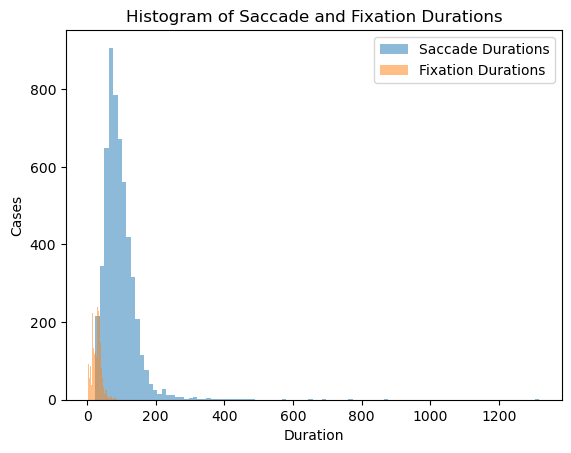

In [4]:
plt.hist(fixations_tmp['duration'], bins=100, alpha=0.5, label='Saccade Durations')
plt.hist(saccades_tmp['duration'], bins=100, alpha=0.5, label='Fixation Durations')

# Adding labels and title
plt.xlabel('Duration')
plt.ylabel('Cases')
plt.title('Histogram of Saccade and Fixation Durations')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

In [5]:
# import matplotlib.pyplot as plt

# # Create a figure and subplots
# fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# # Data for subplots (just for illustration purposes)
# x = [1, 2, 3, 4, 5]
# y = [2, 4, 6, 8, 10]

# # Set names and labels for each subplot
# subplot_names = ['Subplot 1', 'Subplot 2', 'Subplot 3', 'Subplot 4', 'Subplot 5', 'Subplot 6']
# subplot_labels = [('X1', 'Y1'), ('X2', 'Y2'), ('X3', 'Y3'), ('X4', 'Y4'), ('X5', 'Y5'), ('X6', 'Y6')]

# for i, ax in enumerate(axs.flatten()):
#     ax.plot(x, y)
#     ax.set_title(subplot_names[i])
#     ax.set_xlabel(subplot_labels[i][0])
#     ax.set_ylabel(subplot_labels[i][1])

# # Adjust spacing between subplots
# plt.tight_layout()

# # Show the figure
# plt.show()


/var/folders/gf/gp61rxzn3pz1rqw464l71d7w0000gn/T/ipykernel_94867/3820358470.py:45: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axs[1, 0] = plt.subplot( 2,3,4,projection='polar')


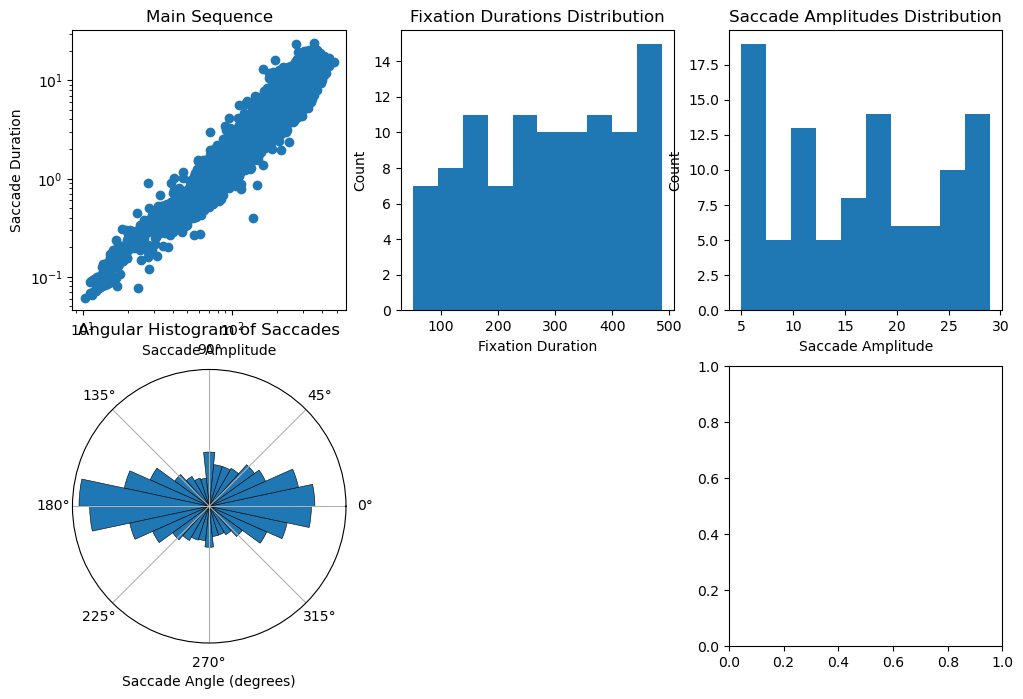

In [13]:
import matplotlib.pyplot as plt
import numpy as np

#plt.hist(fixations_tmp['duration'], bins=100, alpha=0.5, label='Saccade Durations')
#plt.hist(saccades_tmp['duration'], bins=100, alpha=0.5, label='Fixation Durations')

# # Adding labels and title
# plt.xlabel('Duration')
# plt.ylabel('Cases')
# plt.title('Histogram of Saccade and Fixation Durations')

# # Adding legend
# plt.legend()

# Generate sample data for illustration purposes
fixation_durations = np.random.randint(low=50, high=500, size=100)
saccade_amplitudes = np.random.randint(low=5, high=30, size=100)
saccade_angles = np.random.uniform(low=0, high=360, size=100)
saccade_durations = np.random.randint(low=5, high=30, size=100)

# Create a figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot main sequence
axs[0, 0].scatter(all_saccades['sac_vmax'], all_saccades['sac_amplitude'])
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('Saccade Amplitude')
axs[0, 0].set_ylabel('Saccade Duration')
axs[0, 0].set_title('Main Sequence')

# Plot fixations distribution
axs[0, 1].hist(fixation_durations, bins=10)
axs[0, 1].set_xlabel('Fixation Duration')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_title('Fixation Durations Distribution')

# Plot saccades distribution
axs[0, 2].hist(saccade_amplitudes, bins=10)
axs[0, 2].set_xlabel('Saccade Amplitude')
axs[0, 2].set_ylabel('Count')
axs[0, 2].set_title('Saccade Amplitudes Distribution')

# Plot angular histograms of saccades
axs[1, 0] = plt.subplot( 2,3,4,projection='polar')
rose_plot(axs[1,0],  evts[ (evts['type']=='saccade')]['sac_angle'] ,density=False)
axs[1, 0].set_xlabel('Saccade Angle (degrees)')
#axs[1, 0].set_ylabel('Count')
axs[1, 0].set_title('Angular Histogram of Saccades')

# Remove empty subplot
fig.delaxes(axs[1, 1])

# Remove empty subplot


/Users/dac/Documents/repos/MNEdeconv/plot_general.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(label)


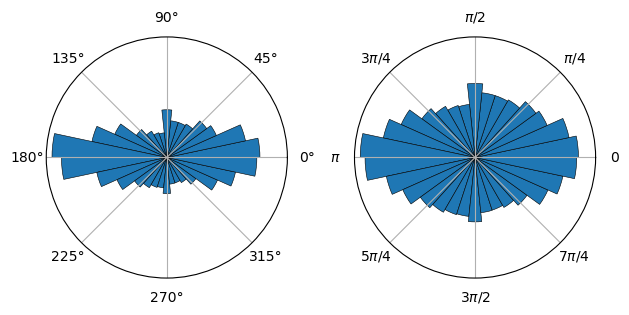

In [9]:

angles0 = evts[ (evts['type']=='saccade')]['sac_angle']
angles1 = np.random.uniform(0, 2*np.pi, size=1000)

# Visualise with polar histogram
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
rose_plot(evts[ (evts['type']=='saccade')]['sac_angle'], angles0,density=False)
rose_plot(ax[1], angles0, lab_unit="radians")
fig.tight_layout()

(array([771., 455., 361., 339., 808., 857., 439., 352., 371., 760.]),
 array([-3.14113808e+00, -2.51287596e+00, -1.88461385e+00, -1.25635173e+00,
        -6.28089619e-01,  1.72495842e-04,  6.28434610e-01,  1.25669672e+00,
         1.88495884e+00,  2.51322095e+00,  3.14148307e+00]),
 <BarContainer object of 10 artists>)

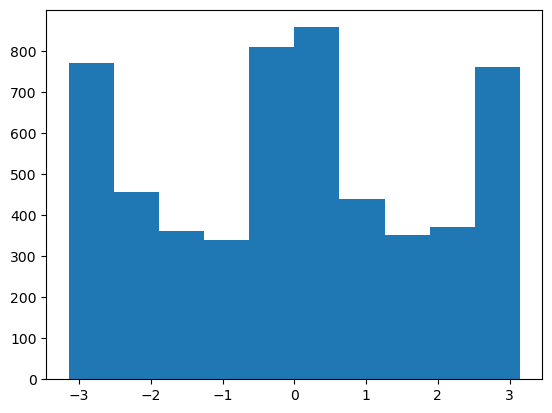

In [82]:
angles = evts[(evts['phase']=='vs') & (evts['type']=='saccade')]['sac_angle']
angles = (angles)*np.pi/180
angles0 = (angles + np.pi) % (2*np.pi) - np.pi
plt.hist(angles)



<Axes: ylabel='Frequency'>

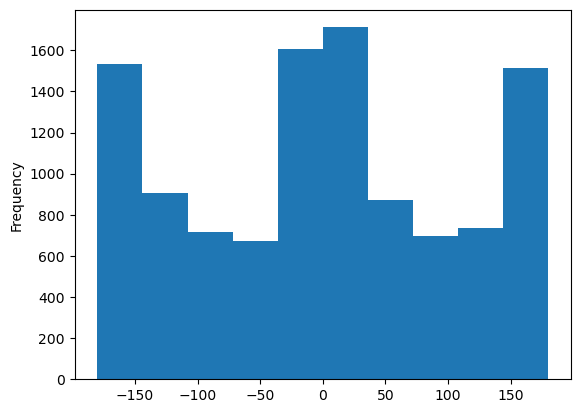

In [51]:
evts[evts['phase']=='vs']['sac_angle'].plot.hist()

In [1]:
evts

NameError: name 'evts' is not defined

(array([  39.,  241.,  741., 1611., 2293., 2367., 1652.,  766.,  223.,
          67.]),
 array([-3.13121617, -2.50735755, -1.88349894, -1.25964032, -0.6357817 ,
        -0.01192308,  0.61193553,  1.23579415,  1.85965277,  2.48351138,
         3.10737   ]),
 <BarContainer object of 10 artists>)

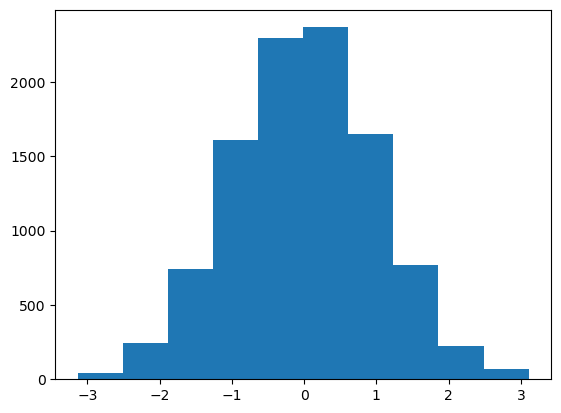

In [68]:
    angles = np.random.normal(loc=0, scale=1, size=10000)
    angles = (angles + np.pi) % (2*np.pi) - np.pi
    plt.hist(angles)


In [3]:
os.path.exists()

'dac\n'